(np.float64(-0.5), np.float64(1278.5), np.float64(1919.5), np.float64(-0.5))

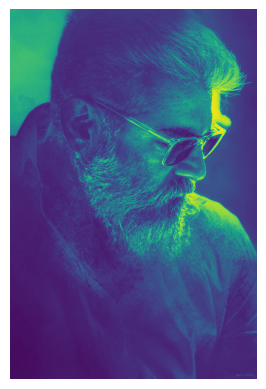

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
image = cv2.imread(r"E:\murugesan\Downloads\thala-ajith.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(image)
plt.axis('off')

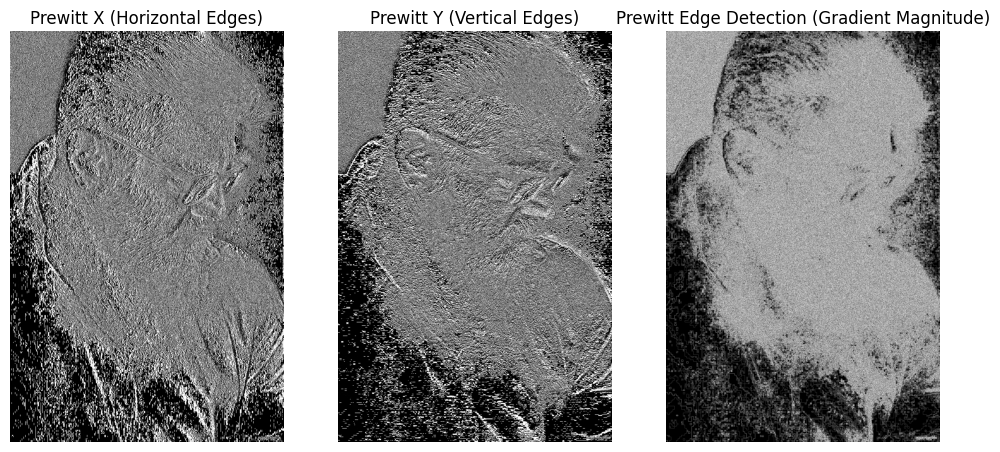

In [26]:
def prewitt_edge_detection():
 
    prewitt_x = np.array([[-1, 0, 1],
                          [-1, 0, 1],
                          [-1, 0, 1]])

    prewitt_y = np.array([[-1, -1, -1],
                          [0,  0,  0],
                          [1,  1,  1]])

    Gx = convolve(image, prewitt_x)
    Gy = convolve(image, prewitt_y)

    edge_magnitude = np.sqrt(Gx**2 + Gy**2)

    edge_magnitude = (edge_magnitude / edge_magnitude.max()) * 255
    edge_magnitude = edge_magnitude.astype(np.uint8)

    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 3, 1)
    plt.imshow(Gx, cmap='gray')
    plt.title('Prewitt X (Horizontal Edges)')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(Gy, cmap='gray')
    plt.title('Prewitt Y (Vertical Edges)')
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.imshow(edge_magnitude, cmap='gray')
    plt.title('Prewitt Edge Detection (Gradient Magnitude)')
    plt.axis('off')

    plt.show()

prewitt_edge_detection()


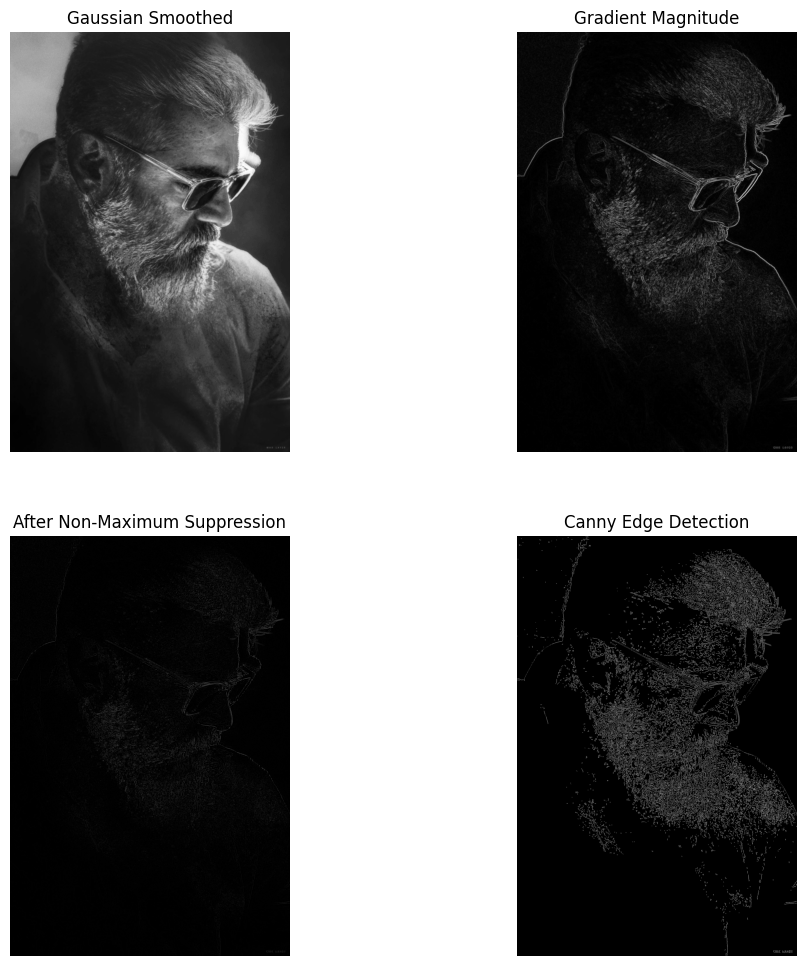

In [2]:
smoothed_image = cv2.GaussianBlur(image, (5, 5), 1.4)

sobel_x = cv2.Sobel(smoothed_image, cv2.CV_64F, 1, 0, ksize=3) 
sobel_y = cv2.Sobel(smoothed_image, cv2.CV_64F, 0, 1, ksize=3) 

magnitude = np.sqrt(sobel_x**2 + sobel_y**2) 
direction = np.arctan2(sobel_y, sobel_x)  

nms_image = np.zeros_like(magnitude)
for i in range(1, magnitude.shape[0] - 1):
    for j in range(1, magnitude.shape[1] - 1):
        angle = direction[i, j] * 180.0 / np.pi
        if angle < 0:
            angle += 180

        if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
            neighbor1 = magnitude[i, j + 1]
            neighbor2 = magnitude[i, j - 1]
        elif (22.5 <= angle < 67.5):
            neighbor1 = magnitude[i + 1, j - 1]
            neighbor2 = magnitude[i - 1, j + 1]
        elif (67.5 <= angle < 112.5):
            neighbor1 = magnitude[i + 1, j]
            neighbor2 = magnitude[i - 1, j]
        elif (112.5 <= angle < 157.5):
            neighbor1 = magnitude[i - 1, j - 1]
            neighbor2 = magnitude[i + 1, j + 1]

        if magnitude[i, j] >= neighbor1 and magnitude[i, j] >= neighbor2:
            nms_image[i, j] = magnitude[i, j]
        else:
            nms_image[i, j] = 0

high_threshold = np.max(nms_image) * 0.1
low_threshold = high_threshold * 0.5

final_edges = np.zeros_like(nms_image)
strong_edges = (nms_image > high_threshold)
weak_edges = (nms_image >= low_threshold) & (nms_image <= high_threshold)

final_edges[strong_edges] = 255

for i in range(1, final_edges.shape[0] - 1):
    for j in range(1, final_edges.shape[1] - 1):
        if weak_edges[i, j]:
            if np.any(final_edges[i - 1:i + 2, j - 1:j + 2] == 255):
                final_edges[i, j] = 255

plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1), plt.imshow(smoothed_image, cmap='gray'), plt.title('Gaussian Smoothed'),plt.axis('off')
plt.subplot(2, 2, 2), plt.imshow(magnitude, cmap='gray'), plt.title('Gradient Magnitude'),plt.axis('off')
plt.subplot(2, 2, 3), plt.imshow(nms_image, cmap='gray'), plt.title('After Non-Maximum Suppression'),plt.axis('off')
plt.subplot(2, 2, 4), plt.imshow(final_edges, cmap='gray'), plt.title('Canny Edge Detection'),plt.axis('off')
plt.show()

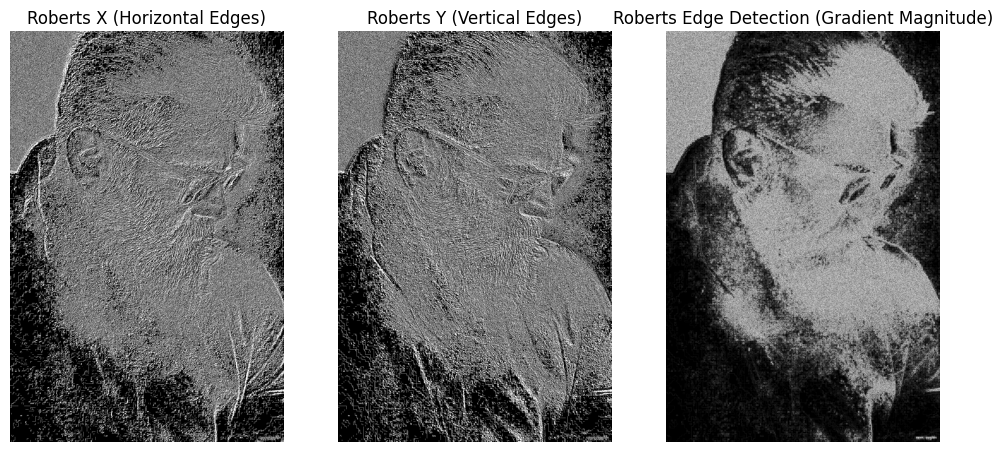

In [30]:
def roberts_edge_detection():
    # Define Roberts kernels
    roberts_x = np.array([[1, 0],
                          [0, -1]])

    roberts_y = np.array([[0, 1],
                          [-1, 0]])

    # Convolve the image with the kernels
    Gx = convolve(image, roberts_x)
    Gy = convolve(image, roberts_y)

    # Compute the gradient magnitude
    edge_magnitude = np.sqrt(Gx**2 + Gy**2)

    # Normalize the result to 0–255
    edge_magnitude = (edge_magnitude / edge_magnitude.max()) * 255
    edge_magnitude = edge_magnitude.astype(np.uint8)

    # Plot the results
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.imshow(Gx, cmap='gray')
    plt.title('Roberts X (Horizontal Edges)')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(Gy, cmap='gray')
    plt.title('Roberts Y (Vertical Edges)')
    plt.axis('off')
    plt.subplot(1, 3, 3)

    plt.imshow(edge_magnitude, cmap='gray')
    plt.title('Roberts Edge Detection (Gradient Magnitude)')
    plt.axis('off')

    plt.show()

# Call the function directly
roberts_edge_detection()


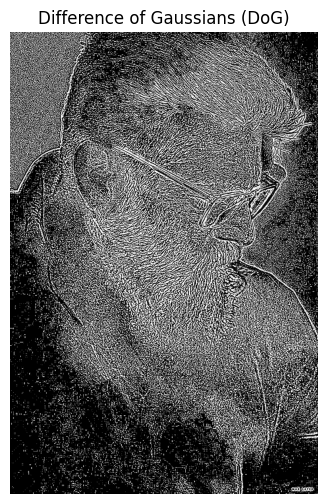

In [31]:
def dog_edge_detection():

    # Step 1: Apply Gaussian blurs with different kernel sizes
    blur1 = cv2.GaussianBlur(image, (5, 5), 1)
    blur2 = cv2.GaussianBlur(image, (9, 9), 2)

    # Step 2: Compute the Difference of Gaussians (DoG)
    dog = blur1 - blur2

    # Normalize DoG result for better visualization
    dog_normalized = cv2.normalize(dog, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # Step 3: Plot the results
    plt.figure(figsize=(12, 6))

    plt.imshow(dog_normalized, cmap='gray')
    plt.title('Difference of Gaussians (DoG)')
    plt.axis('off')

    plt.show()

# Call the function directly
dog_edge_detection()


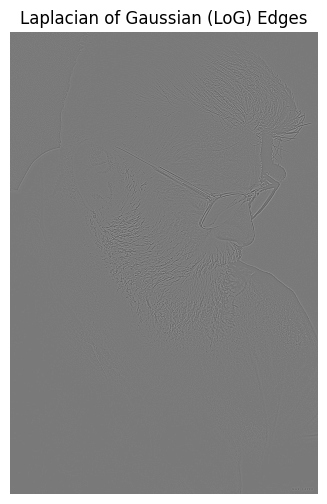

In [32]:
def log_edge_detection():

    # Step 1: Apply Gaussian blur to smooth the image
    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    # Step 2: Apply the Laplacian operator
    log_edges = cv2.Laplacian(blurred, cv2.CV_64F)

    # Step 3: Normalize the result to 0–255 for visualization
    log_edges = cv2.normalize(log_edges, None, 0, 255, cv2.NORM_MINMAX)
    log_edges = np.uint8(log_edges)

    # Step 4: Plot the results
    plt.figure(figsize=(12, 6))
    plt.imshow(log_edges, cmap='gray')
    plt.title('Laplacian of Gaussian (LoG) Edges')
    plt.axis('off')

    plt.show()

# Call the function directly
log_edge_detection()


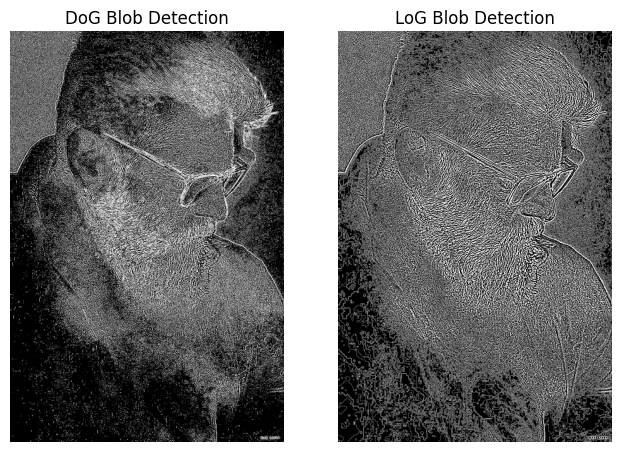

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the image
image = cv2.imread(r'E:\murugesan\Downloads\thala-ajith.jpg', cv2.IMREAD_GRAYSCALE)

# Step 2: Apply Gaussian blur with different sigma values for DoG
sigma1 = 1.0  # Smaller sigma for first Gaussian
sigma2 = 2.0  # Larger sigma for second Gaussian

# Apply Gaussian blurs
gaussian1 = cv2.GaussianBlur(image, (5, 5), sigma1)
gaussian2 = cv2.GaussianBlur(image, (5, 5), sigma2)

# Step 3: Difference of Gaussian (DoG)
dog_image = gaussian1 - gaussian2

# Threshold the DoG result to detect blobs
_, dog_thresholded = cv2.threshold(dog_image, 10, 255, cv2.THRESH_BINARY)

# Step 4: Apply Laplacian of Gaussian (LoG) for blob detection
# Apply Gaussian blur first with a certain sigma value
log_blur = cv2.GaussianBlur(image, (5, 5), 2.0)
log_laplacian = cv2.Laplacian(log_blur, cv2.CV_64F)

# Threshold the LoG result
_, log_thresholded = cv2.threshold(log_laplacian, 0, 255, cv2.THRESH_BINARY)

# Step 5: Display results
plt.figure(figsize=(12, 12))

plt.subplot(1, 3, 1), plt.imshow(dog_thresholded, cmap='gray'), plt.title('DoG Blob Detection')
plt.axis('off')
plt.subplot(1, 3, 2), plt.imshow(log_thresholded, cmap='gray'), plt.title('LoG Blob Detection')
plt.axis('off')
plt.show()